In [ ]:
import torch
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
# Input and output vectors are given. 
inp = [ 0.7300, -1.0400, -1.2300,  1.6700, -0.6300,  1.4300, -0.8400,  0.1500,
         -2.3000,  3.1000, -1.4500, -1.8100,  1.8700, -0.1100, -0.2800,  1.1200,
         -0.4200,  2.8900]
out = [ 1.43,  10.1,  8.3,  1.03,  10.21, -0.1,  8.92,  5.1,
         -7.53, 34.72,  7.61,  3.2,  2.19,  7.15,  7.69, -0.18,
          8.81, 23.1]

t_i = torch.tensor(inp)
t_o = torch.tensor(out)

In [25]:
# Define the polynomial model of degree 3, i.e., having 3 weights and 1 bias. 
# Also define the loss function

def model(w1, w2, w3, t, b):
    return w1*t**3 + w2*t**2 + w3*t + b

def loss_fn(t_o, t_i):
    squared_diffs = (t_o - t_i) ** 2
    return squared_diffs.mean()

Epoch 500, Loss 36.602570
Epoch 1000, Loss 36.602570
Epoch 1500, Loss 36.602570
Epoch 2000, Loss 36.602570
Epoch 2500, Loss 36.602570
Epoch 3000, Loss 36.602570
Epoch 3500, Loss 36.602570
Epoch 4000, Loss 36.602570
Epoch 4500, Loss 36.602570
Epoch 5000, Loss 36.602570


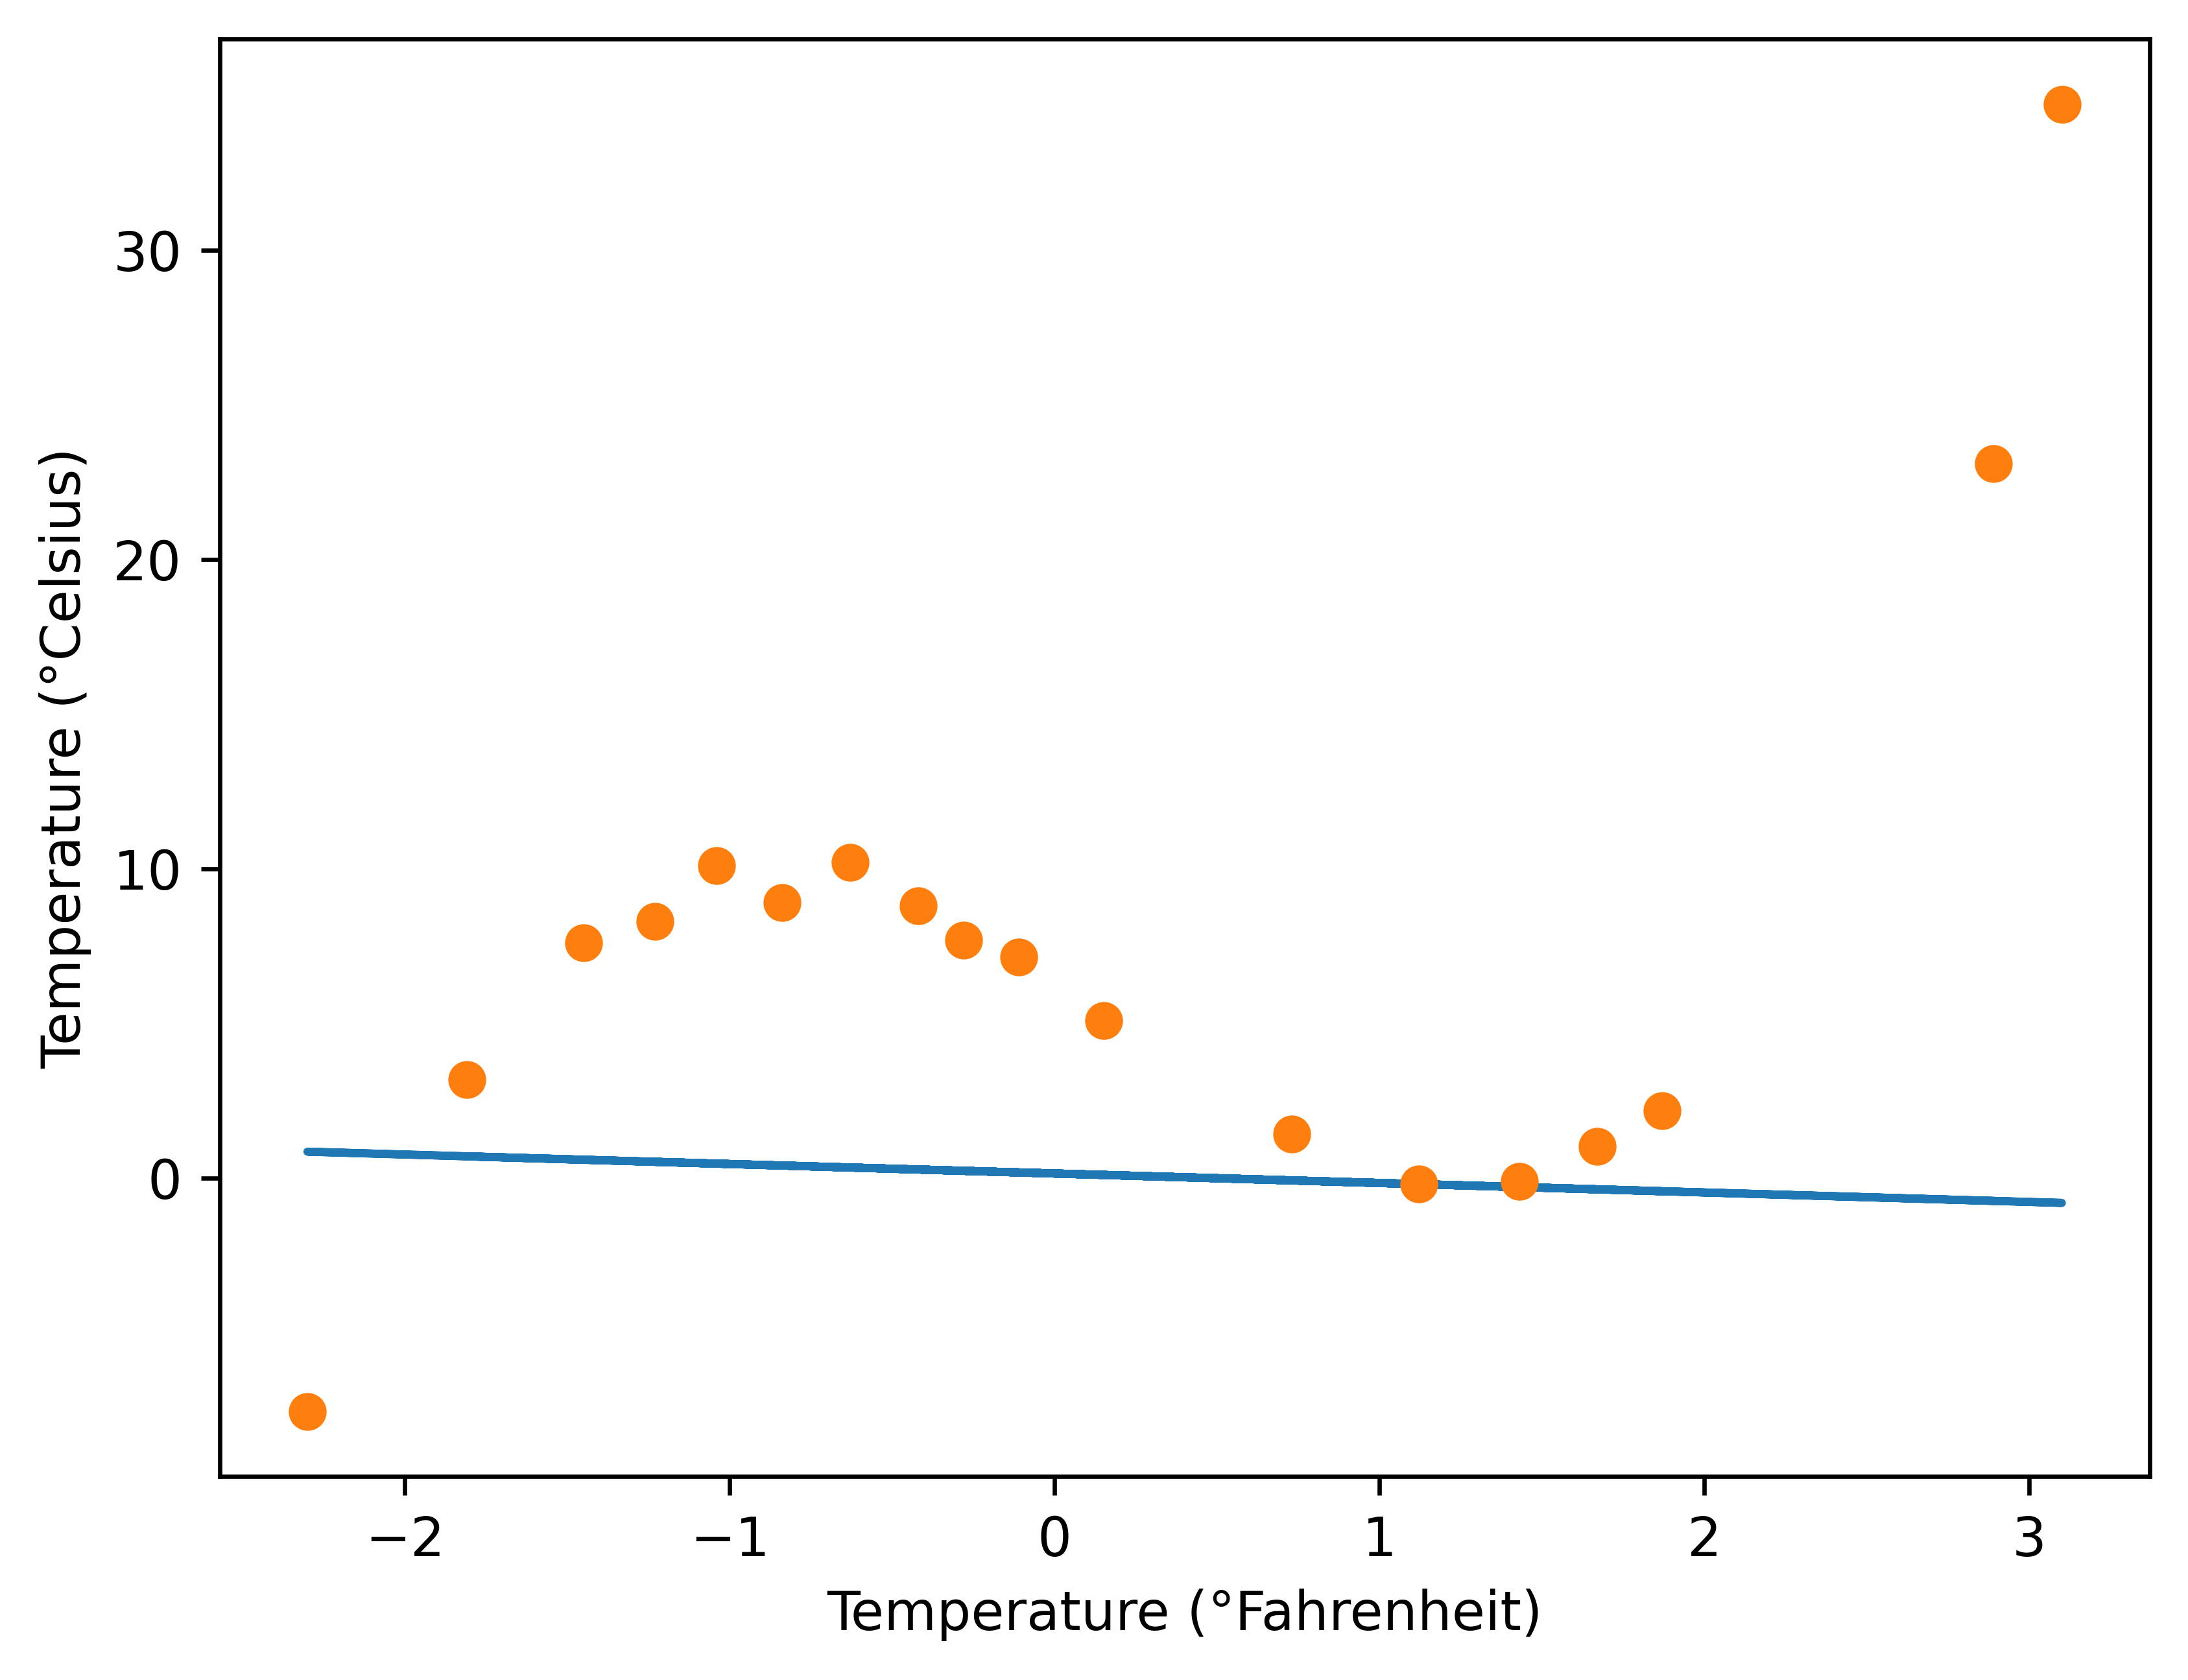

In [38]:
# Define gradient manually wrt the exisiting parameters
# Note: You need to define appropriate derivative functions to define the gradient
# Use the defined gradient function to define the training function 
# Note: You cannot use autograd and optimizers
# Run it on the input and output vector with appropriate learning rate and number of iterations
# Plot the learned curve

def dloss_fn(t_o, t_i):
    dsq_diffs = 2 * (t_o - t_i) / t_o.size(0)
    return dsq_diffs

# wt^3 + wt^2 + wt^1 + b => 3t^2 + 2wt + w
def dmodel_dw1(w1, w2, w3, t, b):
    return (3*w1*t**2 + 2*w2*t + w3)

# 3wt^2 + 2wt + w => 6wt + w
def dmodel_dw2(w1, w2, t, b):
    return (6*w1*t + 2*w2*t)

# 6wt => 6w
def dmodel_dw3(w1, t, b):
    return (6*w1)

def dmodel_db(t_o, w, b):
    return 1.0

def grad_fn(t_u, t_c, t_p, w1, w2, w3, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, w2, w3, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w1, w2, b)
    dloss_dw3 = dloss_dtp * dmodel_dw3(t_u, w1, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w1, b)
    return torch.stack([
        dloss_dw1.sum(),
        dloss_dw2.sum(), 
        dloss_dw3.sum(), 
        dloss_db.sum()
    ])

def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w1, w2, w3, b = params
        t_p = model(w1, w2, w3, t_i, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w1, w2, w3, b)
        params = params - learning_rate * grad
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

t_ui = 0.1 * t_i
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 1.0, 1.0, 0.0]),
    t_u = t_ui,
    t_c = t_o,
    print_params=False
)

t_p = model(t_ui, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_i.numpy(), t_p.detach().numpy())
plt.plot(t_i.numpy(), t_o.numpy(), 'o')

In [30]:
# Use PyTorch's autograd to automatically compute the gradients 
# Define the training function
# Note: You cannot use optimizers.
# Run it on the input and output vector with appropriate learning rate and number of iterations
# Plot the learned curve

t_i = torch.tensor(inp)
t_o = torch.tensor(out)

def training_loop_auto(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        with torch.no_grad():
            params -= learning_rate * params.grad
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

t_ui = 0.1 * t_i
params = training_loop_auto(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_ui,
    t_c = t_o,
)
loss = loss_fn(model(t_i, *params), t_o)
loss.backward()

t_p = model(t_ui, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_i.numpy(), t_p.detach().numpy())
plt.plot(t_i.numpy(), t_o.numpy(), 'o')

TypeError: model() missing 2 required positional arguments: 't' and 'b'

In [ ]:
# Use PyTorch's autograd to automatically compute the gradients 
# Use optimizers to abstract how parameters get updated
# Define the training function
# Run it on the input and output vector with appropriate learning rate, number of iterations, and SGD optimizer
# Plot the learned curve

In [ ]:
# Split the dataset to training set (80%) and validation set (20%) randomly
# Use PyTorch's autograd to automatically compute the gradients 
# Use optimizers to abstract how parameters get updated
# Define the training function that tracks both training and validation losses
# Run it on the input and output vector with appropriate learning rate, number of iterations, and SGD optimizer
# Plot the learned curve